In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv('strokeData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.dropna(inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
#Checking for duplicate data
df.duplicated().sum()

0

In [18]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Explanatory Data Analaysis

In [7]:
#extracting the columns with numerical values
df[['age','avg_glucose_level','bmi',]].describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


## Distribution and Spread

Text(0.5, 1.0, 'Age Spread')

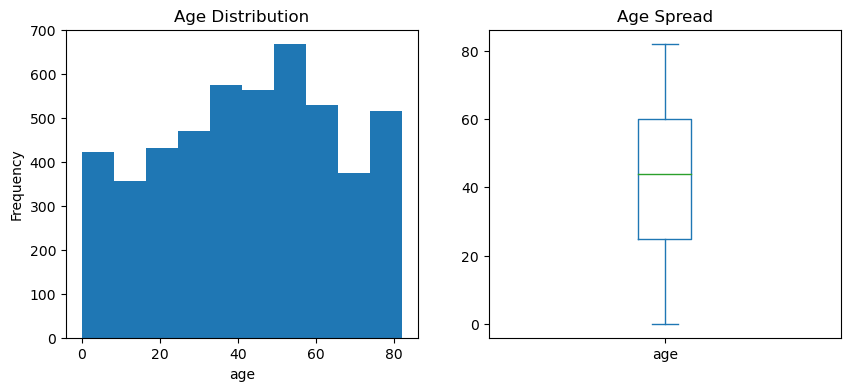

In [16]:
plt.figure(figsize = (10, 4))

plt.subplot(1,2,1)
df['age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('age')

plt.subplot(1,2,2)
df['age'].plot(kind='box')
plt.title('Age Spread')

The graphs reperesents the distribution and spread of the ages in the datatest. With the mean age set as 42, we can also see that distribution is normal

Text(0.5, 1.0, 'Spread of Patients Average glucose level')

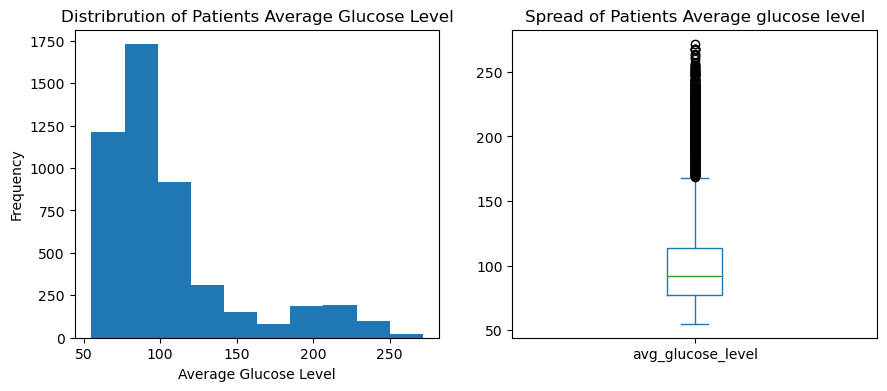

In [23]:
plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
df['avg_glucose_level'].plot(kind='hist')
plt.title('Distribrution of Patients Average Glucose Level')
plt.xlabel('Average Glucose Level')

plt.subplot(1,3,2)
df['avg_glucose_level'].plot(kind='box')
plt.title('Spread of Patients Average glucose level')

The graphs above represents the distribution and spread of the average glucose level in the dataset. We can see that the distribution is right skewed and the spread of the average glucose level has a lot of outliers. We will possibly need to correct this through standardization later on.

Text(0.5, 1.0, 'Spread of patients BMI')

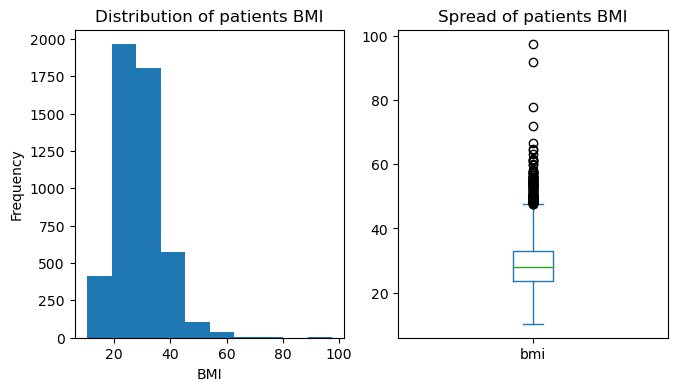

In [29]:
plt.figure(figsize = (16, 4))

plt.subplot(1,4,1)
df['bmi'].plot(kind='hist')
plt.title('Distribution of patients BMI')
plt.xlabel('BMI')

plt.subplot(1,4,2)
df['bmi'].plot(kind='box')
plt.title('Spread of patients BMI')

The graphs above represents the distribution and spread of the BMIs in the dataset. We can see that the distribution is right skewed and the spread of the average glucose level has a lot of outliers. We will correct this using standardization later on.

## Stroke Patients Analysis

Let's look at Stroke. With 1 being that the patient had stroke and 0 being no stroke. Let's calculate how many patients had a stroke.

In [31]:
stroke_counttotal = df[['stroke']].value_counts().sum()
print('The total patients who have had a stroke is', stroke_counttotal)

The total patients who have had a stroke is 4909


In [32]:
stroke_count = df['stroke'].value_counts().reset_index(name='count')
stroke_count.columns = ['stroke', 'count']
stroke_count['percentage'] = (stroke_count['count'] / stroke_count['count'].sum()) * 100
stroke_count

,stroke,count,percentage
0,0,4700,95.742514
1,1,209,4.257486


<AxesSubplot:xlabel='stroke', ylabel='percentage'>

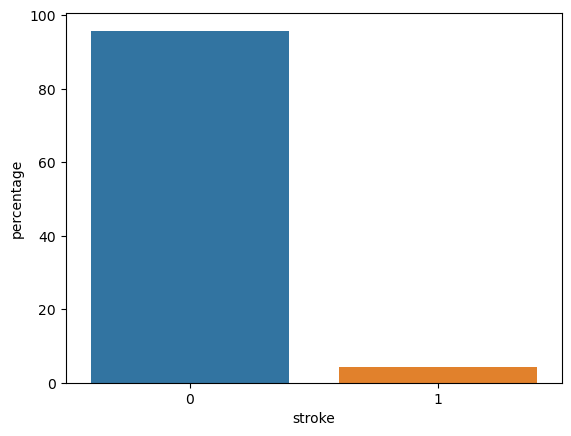

In [33]:
sns.barplot(x='stroke', y = 'percentage', data = stroke_count)

There are 4909 patients in this dataset. Of the 4909, 4% (209) of the patients had a stroke, while 96% didn't. Let's take a closer look at the patients who have had a stroke.

Let's take a closer look at the persons who had a stroke. We will zoom in closer on their age, gender, if they have hypertension, if they have heart disease, if they were ever married, their type of work,etc.

In [37]:
condition = (1)
stroke_patients = df[(df['stroke'] == 1)]

### Gender

In [38]:
#Gender of patients who have had a stroke
gender_stroke = stroke_patients.groupby(['gender']).size().reset_index(name = 'count')
gender_stroke

,gender,count
0,Female,120
1,Male,89


<AxesSubplot:title={'center':'Bar Graph Comparing of Genders of Stroke Patients'}, xlabel='gender', ylabel='count'>

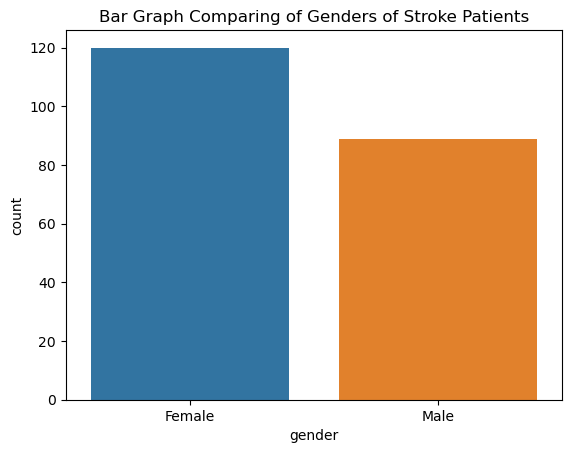

In [39]:
plt.title('Bar Graph Comparing of Genders of Stroke Patients')
sns.barplot(x='gender', y = 'count', data = gender_stroke)

The above bar chart shows the number of males and females who have had a stroke. Of the 209 patients, 120 women have had a stroke and 89 men have had a stroke. From this dataset 14% more women have had a stroke when compared to men.

### Age

In [40]:
#let's look at the age of the patients who had a stroke
age_stroke = stroke_patients.groupby(['age']).size().reset_index(name = 'count')

There are a wide range of ages, But here we can see that patients who are at the age of around 78 or 80 are more likely to have a stroke. Let's group the ages into 4 and see what age group of patients were more likely to have a stroke.

In [41]:
age_ranges = [0, 24, 45, 60, 80, 100]

stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_ranges, labels=['0 to 24', '25 to 44', '45 to 59', '69 to 79', '80 to 99'])

age_groups = stroke_patients.groupby(['age_group']).size().reset_index(name = 'count')
age_groups 

C:\Users\losci\AppData\Local\Temp\ipykernel_8712\721971363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_ranges, labels=['0 to 24', '25 to 44', '45 to 59', '69 to 79', '80 to 99'])


,age_group,count
0,0 to 24,1
1,25 to 44,10
2,45 to 59,52
3,69 to 79,123
4,80 to 99,23


Text(0.5, 1.0, 'Bar chart showing the age group of stroke patients')

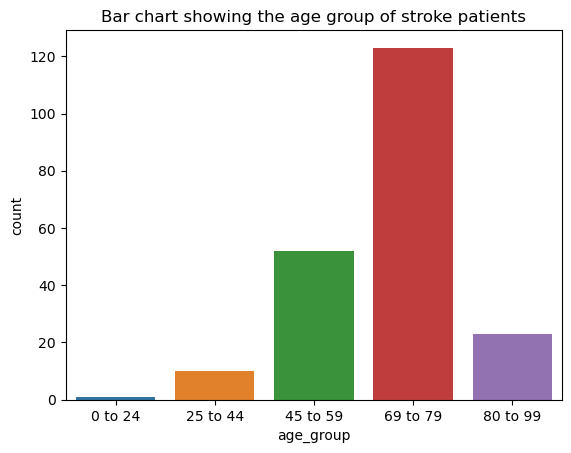

In [42]:
sns.barplot(x='age_group', y='count', data = age_groups)
plt.title('Bar chart showing the age group of stroke patients')

Here we can see that pattients between the ages of 68 to 79 were more likely to have a stroke. Patients who were also between the ages of 45 to 59, were next in line to have a stroke. The younger you are, your chances of having a stroke decreases.

### Hypertension

In [43]:
#let's look at the persons who have hypertension
hypertension_stroke = stroke_patients.groupby(['hypertension']).size().reset_index(name = 'count')
hypertension_stroke

,hypertension,count
0,0,149
1,1,60


Text(0.5, 1.0, "Comparison of Stroke Patients who have and don't have hypertension")

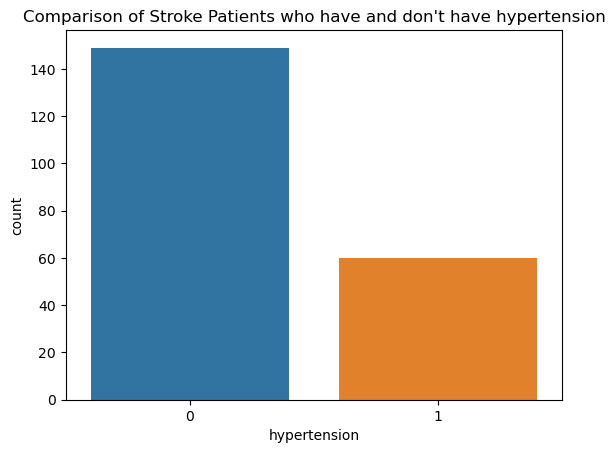

In [44]:
sns.barplot(x='hypertension', y='count', data = hypertension_stroke)
plt.title("Comparison of Stroke Patients who have and don't have hypertension")

Here we can see the of the 209 stroke patients, 60 patients had hypertension. While 149 did not, that 29% of the stroke patients.

### Heart Disease

In [47]:
#let's look at heart disease
heart_disease = stroke_patients.groupby(['heart_disease']).size().reset_index(name = 'count')
heart_disease

,heart_disease,count
0,0,169
1,1,40


Text(0.5, 1.0, "Bar Graph showing stroke patients who have and don't have heart diseases")

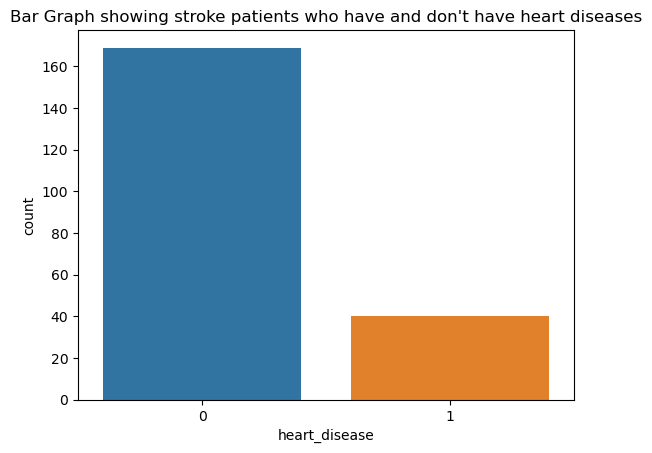

In [48]:
sns.barplot(x = 'heart_disease',y='count', data = heart_disease )
plt.title("Bar Graph showing stroke patients who have and don't have heart diseases")

We can see that a smaller percentage of stroke patients have heart diseases. Of the 209 patients, 40 of them (19%) have heart disease while 169 don't.

### Marriage

In [49]:
#let's look at if these patients were ever married
marriage = stroke_patients.groupby(['ever_married']).size().reset_index(name = 'count')
marriage

,ever_married,count
0,No,23
1,Yes,186


Text(0.5, 1.0, 'Bar Plot showing stroke patients who are married and never married')

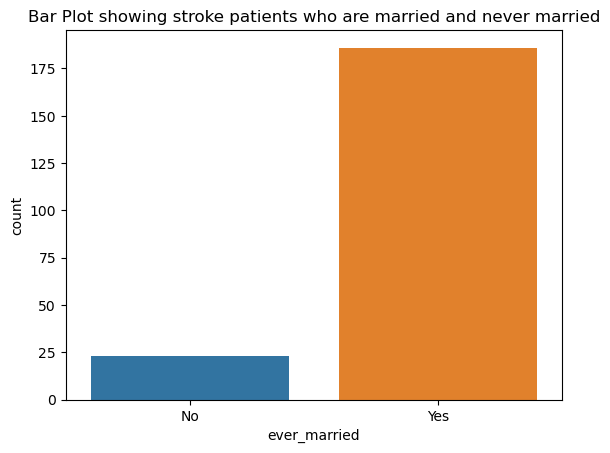

In [50]:
sns.barplot(x='ever_married', y='count', data =marriage)
plt.title('Bar Plot showing stroke patients who are married and never married')

Wow, so many married folks. Of the 209 stroke patients, 186 of them were married. While 23 of them were not. This accountd for 89% of the stroke patients being married.

### Work Type

In [51]:
#let's look at the work type
work_type = stroke_patients.groupby(['work_type']).size().reset_index(name = 'count')
work_type

,work_type,count
0,Govt_job,28
1,Private,127
2,Self-employed,53
3,children,1


Text(0.5, 1.0, 'Showing the different type of work done by stroke patients')

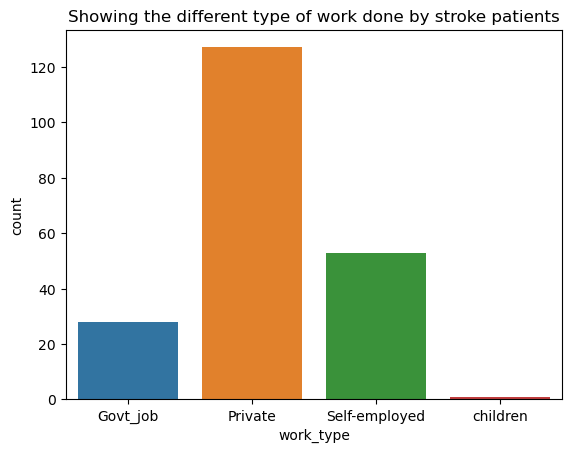

In [52]:
sns.barplot(x= 'work_type', y= 'count', data = work_type)
plt.title('Showing the different type of work done by stroke patients')

Here we can see that patients who work in the private sector were more likely to have a stroke. That includes 127 patients, this accounts for 61% of the patients who had a stroke. Persons who work in the government sector were least unlikely to have a stroke. With the one exception of a child who had a stroke.

### Residence

In [53]:
#let's also look into their residence type
residence = stroke_patients.groupby(['Residence_type']).size().reset_index(name ='count')
residence

,Residence_type,count
0,Rural,100
1,Urban,109


Text(0.5, 1.0, 'Bar plot showing comparison of residence for stroke patients')

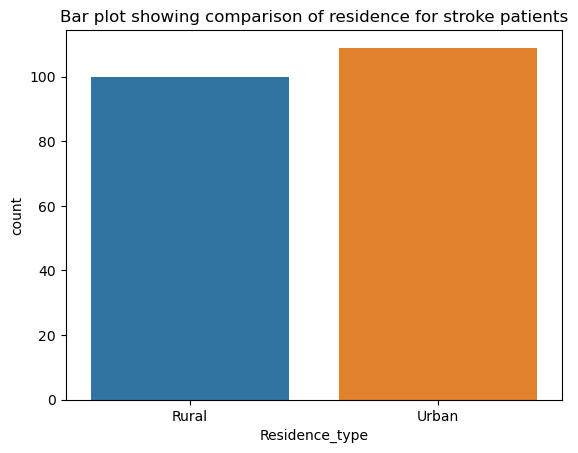

In [54]:
sns.barplot(x='Residence_type', y='count', data=residence)
plt.title('Bar plot showing comparison of residence for stroke patients')

Here we can see that there is a somewhat an even distribution of the type of residence of stroke patients, between rural and urban residence.

### Average Glucose Level

Let's look at the average glucose level. We will place them into bins amd categorize them. According to The U.S. National Institutes of Health,

A normal fasting glucose level should be below 99 Mg.
100 to 125 mg indicates you have prediabetes
126 or higher indicates that you have diabetes.
We will use the metric to group the stroke patients.

In [56]:
# Convert 'avg_glucose_level' column to numeric type
stroke_patients['avg_glucose_level'] = stroke_patients['avg_glucose_level'].astype(int)

# Define the glucose range including the lower and upper bounds
glu_range = [0, 99, 125, float('inf')]

# Assign labels to each bin
labels = ['0 to 99', '100 to 125', '126 and over']

# Perform binning based on glucose range and labels
stroke_patients['avg_glucose_level'] = pd.cut(stroke_patients['avg_glucose_level'], bins=glu_range, labels=labels)

# Group the data and count the occurrences of each group
glu_group = stroke_patients.groupby('avg_glucose_level').size().reset_index(name='count')

glu_group


C:\Users\losci\AppData\Local\Temp\ipykernel_8712\3278095331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['avg_glucose_level'] = stroke_patients['avg_glucose_level'].astype(int)
C:\Users\losci\AppData\Local\Temp\ipykernel_8712\3278095331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['avg_glucose_level'] = pd.cut(stroke_patients['avg_glucose_level'], bins=glu_range, labels=labels)


,avg_glucose_level,count
0,0 to 99,93
1,100 to 125,29
2,126 and over,87


<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

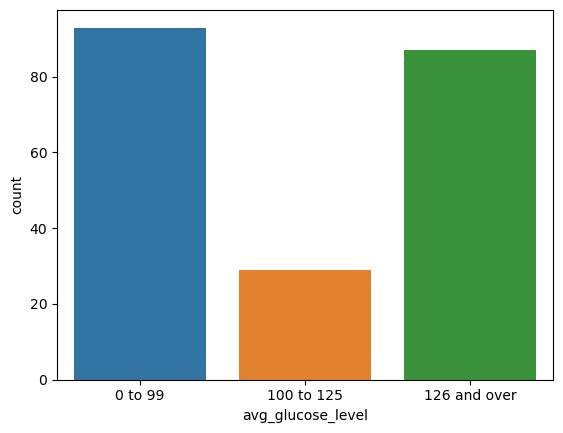

In [57]:
sns.barplot(x='avg_glucose_level', y = 'count', data = glu_group)

## BMI
Let's look at BMI, we will use the following criteria below to categorize the stroke patients BMI.

<ul><li>If your BMI is less than 18.5, it falls within the underweight range.
    <li>If your BMI is 18.5 to 25, it falls within the healthy weight range.
<li>If your BMI is 25.0 to 30, it falls within the overweight range.
<li>If your BMI is 30.0 or higher, it falls within the obesity range.
</ul>

In [58]:
# Convert 'avg_glucose_level' column to numeric type


# Define the glucose range including the lower and upper bounds
bmi_range = [0, 18.4, 25.0, 30.0, float('inf')]

# Assign labels to each bin
labels = ['0 to 18.4', '18.5 to 24.9', '25.0 to 29.9', '30.0 and over']

# Perform binning based on glucose range and labels
stroke_patients['bmi'] = pd.cut(stroke_patients['bmi'], bins=bmi_range, labels=labels)

# Group the data and count the occurrences of each group
bmi_group = stroke_patients.groupby('bmi').size().reset_index(name='count')

bmi_group

C:\Users\losci\AppData\Local\Temp\ipykernel_8712\1915846607.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['bmi'] = pd.cut(stroke_patients['bmi'], bins=bmi_range, labels=labels)


,bmi,count
0,0 to 18.4,1
1,18.5 to 24.9,37
2,25.0 to 29.9,75
3,30.0 and over,96


<AxesSubplot:xlabel='bmi', ylabel='count'>

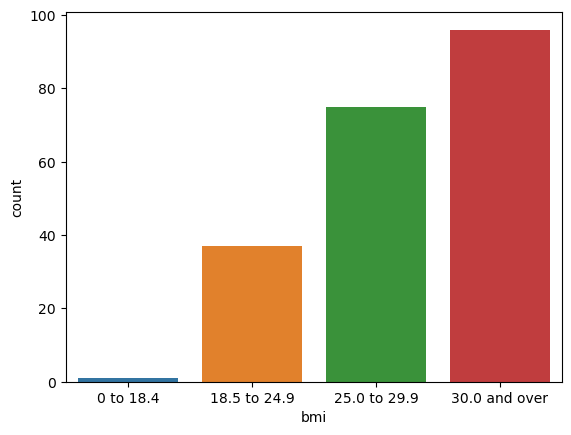

In [59]:
sns.barplot(x='bmi', y='count', data = bmi_group)


Here we can see that about 50% of the stroke patients have a bmi of 30.0 and over, and are categorized as obese, and also 75 stroke patients also fall into the overweight range.

## Smoking status

In [61]:
#smoking_status
smoking_count = stroke_patients.groupby('smoking_status').size().reset_index(name = 'count')
smoking_count

,smoking_status,count
0,Unknown,29
1,formerly smoked,57
2,never smoked,84
3,smokes,39


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

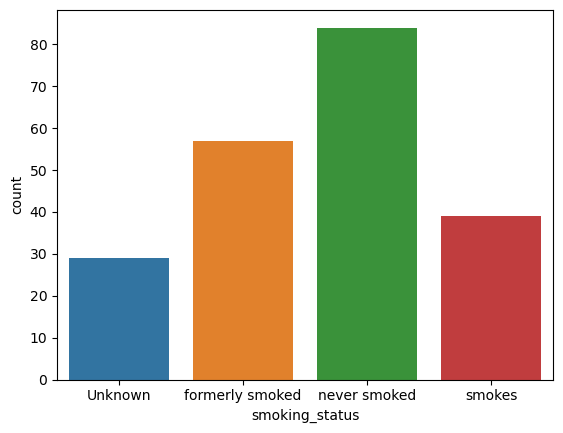

In [62]:
sns.barplot(x='smoking_status', y='count', data = smoking_count)

## Model Evaluation
For this assesment, we will be using the following models to predict how likely a patient will have a stroke. From the Explanatory Analysis above, we can clearly see a trend in the different age groups, persons who are married, gender, and the type of job. It seems that the residence type might not have a huge impact on the residence type.

In [63]:
#import libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [64]:
features = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]

#let's do one hot encoding on our numerical values
features_one_hot = pd.get_dummies(features, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [65]:
X = pd.concat([features_one_hot, df[['hypertension', 'bmi', 'avg_glucose_level']]], axis = 1)
y = df['stroke']

#let's standardize the data
X= preprocessing.StandardScaler().fit(X).transform(X)


#let's split the data for testing and training
train_X, test_X, train_y, test_y= train_test_split(X, y, random_state = 0)

## Logistic Regression

In [66]:
#let's select the parameters
parameters1 ={}
#let's create a logistic regression object
lr=LogisticRegression()
#let's create a gridsearch object
grid_search1 = GridSearchCV(lr,parameters1, cv=10)

logreg_cv = grid_search1.fit(train_X, train_y)
print("accuracy :",logreg_cv.best_score_)

accuracy : 0.9565335218569577


 ## Decision Tree Classifier

In [67]:
# Combine preprocessing and classifier into a pipeline
parameters2 = {}

tree = DecisionTreeClassifier()
grid_search2 = GridSearchCV(tree, parameters2, cv = 10)

tree_cv = grid_search2.fit(train_X, train_y)
print("accuracy :",tree_cv.best_score_)

accuracy : 0.9130707258159537


## Support Vector Machines

In [69]:
parameters4 = {}
svm = SVC()
grid_search4 = GridSearchCV(svm, parameters4, cv = 10)

svm_cv = grid_search4.fit(train_X, train_y)
print("accuracy :",svm_cv.best_score_)


accuracy : 0.9565335218569577


## KNN

In [70]:
parameters5 = {}

KNN = KNeighborsClassifier()

gridsearch5 = GridSearchCV(KNN, parameters5, cv = 10)

knn_cv = gridsearch5.fit(train_X, train_y)
print("accuracy :",knn_cv.best_score_)

C:\Users\losci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\losci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy : 0.956261782726523


C:\Users\losci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Summary and Analysis

In [71]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(test_X, test_y))
print( 'Accuracy for Support Vector Machine method:', svm_cv.score(test_X, test_y))
print('Accuracy for Decision tree method:', tree_cv.score(test_X, test_y))
print('Accuracy for K nearest neighbors method:', knn_cv.score(test_X, test_y))


Accuracy for Logistics Regression method: 0.9600977198697068
Accuracy for Support Vector Machine method: 0.9600977198697068
Accuracy for Decision tree method: 0.9234527687296417
Accuracy for K nearest neighbors method: 0.9576547231270358


C:\Users\losci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
